## Supervised learning assignment
- Name: Daan Steur
- Studentnumber: 379943
- Supervisor: Dr. Dave Langers
- Course: DSLS Data Science 3: Deep learning
- Date: 24th of june

# Title

## Assignment


## data source


In [90]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
import opendatasets as od
import glob as glob
import cv2, os


### Data Download

In [91]:
# # this command will automatically download the dataset in about 4 minutes
# # requirments for this command: pip install opendatasets
# od.download("https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download")

# # if the command is not working, you can download the dataset manually
# def create_dir(dir_name):
#     if not os.path.exists(dir_name):
#         os.makedirs(dir_name)
# # create_dir('rice-image-dataset')

# # Data download link
# download_link = "https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download"

# # after downloading the dataset, unzip it
# # !unzip rice-image-dataset.zip


### Exploration & preprocessing

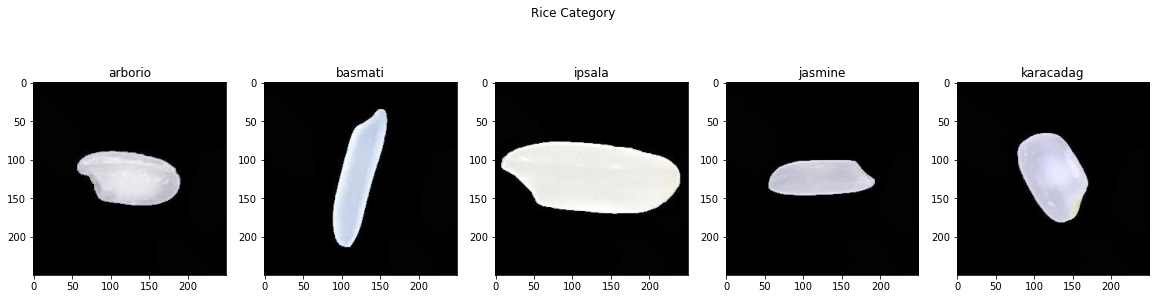

In [92]:
# Separating the categories
data_dir = 'rice-image-dataset/Rice_Image_Dataset/'
arborio = glob.glob(f'{data_dir}Arborio/*.jpg')[:10]
basmati = glob.glob(f'{data_dir}Basmati/*.jpg')[:10]
ipsala = glob.glob(f'{data_dir}Ipsala/*.jpg')[:10]
jasmine = glob.glob(f'{data_dir}Jasmine/*.jpg')[:10]
karacadag = glob.glob(f'{data_dir}Karacadag/*.jpg')[:10]

# Create a figure with all the rice categories
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

Found 60000 images belonging to 5 classes.
(20, 100, 100, 3) float32 (20, 5) float32


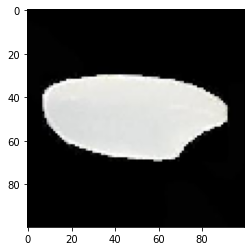

Found 15000 images belonging to 5 classes.
(20, 100, 100, 3) float32 (20, 5) float32


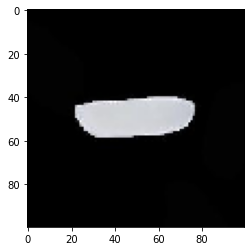

In [93]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = image_generator.flow_from_directory(shuffle=True,
                                                      directory=data_dir,
                                                      batch_size=20,
                                                      color_mode='rgb',
                                                      target_size=(100,100),
                                                      subset='training',
                                                      class_mode='categorical')

for x_train, y_train in train_generator:
    print(x_train.shape, x_train.dtype, y_train.shape, y_train.dtype)
    break
plt.imshow(x_train[1])
plt.show()

test_generator = image_generator.flow_from_directory(shuffle=True,
                                                      directory=data_dir,
                                                      batch_size=20,
                                                      color_mode='rgb',
                                                      target_size=(100,100),
                                                      subset='validation',
                                                      class_mode='categorical')
for x_test, y_test in test_generator:
    print(x_test.shape, x_test.dtype, y_test.shape, y_test.dtype)
    break
plt.imshow(x_test[1])
plt.show()
                                                      
                                            

tried three difference target sizes, 250, which was the standard image size, 200 and 100,
ultimately 100 still gives enough detail for good training, lower is not recommended, as the resolutions becomes questionable.

### Baseline model

In [94]:
# reshape into 2d array
x_train.shape,x_test.shape

#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

#so,eventually,model.predict() should also be a 2d input

x_test = x_test/255.0
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))


print(x_train2.shape, x_test2.shape)

(20, 30000) (20, 30000)


In [95]:
# sklearn create a Regression model for image classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

model = RandomForestClassifier()
fit = model.fit(x_train2, y_train)

y_pred = model.predict(x_train2)
y_pred

print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))


0.15
              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.00      0.00      0.00         3
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         2
           4       0.25      0.20      0.22         5

   micro avg       0.15      0.15      0.15        20
   macro avg       0.14      0.12      0.13        20
weighted avg       0.17      0.15      0.16        20
 samples avg       0.15      0.15      0.15        20



Evalute the model

### Fully-connected neural network model

In [96]:
# neural network
neural = keras.models.Sequential()
# add input layer
neural.add(keras.layers.InputLayer(input_shape=(100,100,3), name='input'))
neural.add(keras.layers.Flatten(name='flatten'))
neural.add(keras.layers.Dense(units=256, activation='relu', name = 'dense_1'))
neural.add(keras.layers.Dense(units=128, activation='relu', name = 'dense_2'))
neural.add(keras.layers.Dense(units=64, activation='relu', name = 'dense_3'))
neural.add(keras.layers.Dense(units=32, activation='relu', name = 'dense_4'))
neural.add(keras.layers.Dense(units=16, activation='relu', name = 'dense_5'))
# output layer
neural.add(keras.layers.Dense(units=5, activation='softmax', name = 'output'))
neural.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense_1 (Dense)             (None, 256)               7680256   
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 output (Dense)              (None, 5)                

In [97]:
# compile
neural.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(),
                  metrics=keras.metrics.CategoricalAccuracy())

In [98]:
# fit 
history_neural = neural.fit(
    train_generator,
    epochs=10,
    steps_per_epoch= 100,
    validation_data=test_generator,
    validation_steps=25)

history_neural.history.keys()

Epoch 1/10
100/100 [==============================] - 21s 185ms/step - loss: 0.7237 - categorical_accuracy: 0.7350 - val_loss: 0.3554 - val_categorical_accuracy: 0.8640
Epoch 2/10
100/100 [==============================] - 17s 174ms/step - loss: 0.2717 - categorical_accuracy: 0.9075 - val_loss: 0.1683 - val_categorical_accuracy: 0.9480
Epoch 3/10
100/100 [==============================] - 18s 183ms/step - loss: 0.2369 - categorical_accuracy: 0.9245 - val_loss: 0.2739 - val_categorical_accuracy: 0.9100
Epoch 4/10
100/100 [==============================] - 17s 174ms/step - loss: 0.2135 - categorical_accuracy: 0.9245 - val_loss: 0.1647 - val_categorical_accuracy: 0.9440
Epoch 5/10
100/100 [==============================] - 20s 196ms/step - loss: 0.1652 - categorical_accuracy: 0.9380 - val_loss: 0.1774 - val_categorical_accuracy: 0.9540
Epoch 6/10
100/100 [==============================] - 19s 190ms/step - loss: 0.1745 - categorical_accuracy: 0.9450 - val_loss: 0.1634 - val_categorical_acc

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

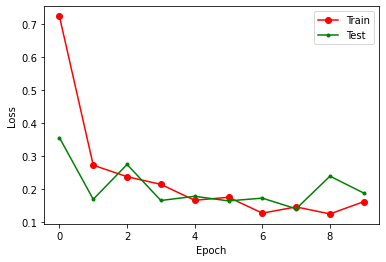

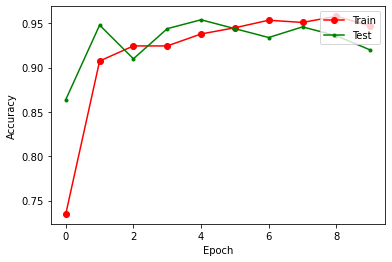

In [99]:
plt.plot(history_neural.history['loss'], marker='o', c='red', label='loss')
plt.plot(history_neural.history['val_loss'], marker='.', c='green', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_neural.history['categorical_accuracy'], marker='o', c='red', label='acc')
plt.plot(history_neural.history['val_categorical_accuracy'], marker='.', c='green', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Regularized convolutional neural network model

In [100]:
# convolutional neural network
cov = keras.models.Sequential()

cov.add(keras.layers.InputLayer(input_shape=(100,100, 3),name='input'))
cov.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation=keras.activations.relu, name='conv_1'))

cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_1'))

cov.add(keras.layers.Conv2D(filters = 48, kernel_size=(3,3), activation=keras.activations.relu, name='conv_3'))

cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_2'))

cov.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=keras.activations.relu, name='conv_5'))

cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_3'))

cov.add(keras.layers.Conv2D(filters = 96, kernel_size=(3,3), activation=keras.activations.relu, name='conv_7'))

cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_4'))

cov.add(keras.layers.Flatten(name='flatten'))
cov.add(keras.layers.Dense(units=64, activation=keras.activations.relu, name='hidden_1'))
cov.add(keras.layers.Dense(units=5, activation=keras.activations.softmax, name='output'))

cov.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 pool_1 (MaxPooling2D)       (None, 49, 49, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 47, 47, 48)        13872     
                                                                 
 pool_2 (MaxPooling2D)       (None, 23, 23, 48)        0         
                                                                 
 conv_5 (Conv2D)             (None, 21, 21, 64)        27712     
                                                                 
 pool_3 (MaxPooling2D)       (None, 10, 10, 64)        0         
                                                                 
 conv_7 (Conv2D)             (None, 8, 8, 96)         

In [101]:
# compile
cov.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(),
                  metrics=keras.metrics.CategoricalAccuracy())

In [102]:
# fit 
history_cov = cov.fit(
    train_generator,
    epochs=10,
    steps_per_epoch= 100,
    validation_data=test_generator,
    validation_steps=25)

history_cov.history.keys()

Epoch 1/10
100/100 [==============================] - 30s 280ms/step - loss: 0.6858 - categorical_accuracy: 0.7105 - val_loss: 0.3042 - val_categorical_accuracy: 0.8800
Epoch 2/10
100/100 [==============================] - 26s 264ms/step - loss: 0.2418 - categorical_accuracy: 0.9115 - val_loss: 0.1484 - val_categorical_accuracy: 0.9520
Epoch 3/10
100/100 [==============================] - 26s 259ms/step - loss: 0.1855 - categorical_accuracy: 0.9375 - val_loss: 0.1572 - val_categorical_accuracy: 0.9500
Epoch 4/10
100/100 [==============================] - 28s 276ms/step - loss: 0.1345 - categorical_accuracy: 0.9530 - val_loss: 0.1761 - val_categorical_accuracy: 0.9380
Epoch 5/10
100/100 [==============================] - 26s 264ms/step - loss: 0.1813 - categorical_accuracy: 0.9330 - val_loss: 0.1996 - val_categorical_accuracy: 0.9200
Epoch 6/10
100/100 [==============================] - 27s 274ms/step - loss: 0.1554 - categorical_accuracy: 0.9445 - val_loss: 0.1034 - val_categorical_acc

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

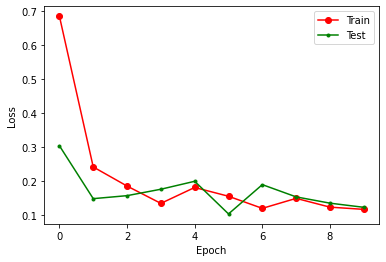

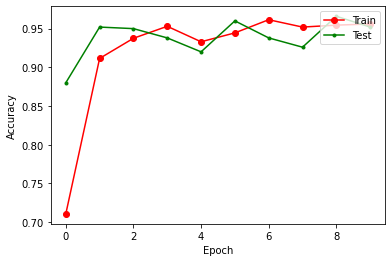

In [103]:
# evaluate

plt.plot(history_cov.history['loss'], marker='o', c='red', label='loss')
plt.plot(history_cov.history['val_loss'], marker='.', c='green', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_cov.history['categorical_accuracy'], marker='o', c='red', label='acc')
plt.plot(history_cov.history['val_categorical_accuracy'], marker='.', c='green', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
# get prediction vlaues 


### Summary

Baseline: 

Neural network: 

Convolution neural network

### improvements to be made

fine tune the model etc etc etc